In [ ]:
import pandas as pd

In [ ]:
!gdown --id 1slxNcUnAYHPBIRiSfkQwR0cIFfMNCh7X

Downloading...
From: https://drive.google.com/uc?id=1slxNcUnAYHPBIRiSfkQwR0cIFfMNCh7X
To: /content/trai.csv.txt
100% 191M/191M [00:01<00:00, 114MB/s]


In [ ]:
train = pd.read_csv("trai.csv.txt")

In [ ]:
!gdown --id 1Y3ApZ8-xVEZIam8o6AK-vW4uvDM2XnIh

Downloading...
From: https://drive.google.com/uc?id=1Y3ApZ8-xVEZIam8o6AK-vW4uvDM2XnIh
To: /content/tes.csv.txt
100% 47.7M/47.7M [00:00<00:00, 152MB/s] 


In [ ]:
test = pd.read_csv("tes.csv.txt")

In [ ]:
train.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,187,0,0,0,0,0,0,0,0,...,0,0,61,187,186,188,188,186,187,187,188,187,187,186,187,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,49,90,48,...,45,167,187,188,188,187,188,188,131,31,0,38,33,0,35,52,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parasitized,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,155,190,190,190,192,190,191,190,20,1,1,1,1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,1,64,183,182,182,185,189,190,95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,152,186,185,176,5,5,5,2,0,0,0,...,0,0,0,0,0,0,0,0,5,155,186,185,174,5,0,0,5,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,10,188,187,185,184,185,183,181,181,180,180,180,180,180,179,179,179,180,178,179,133,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,63,187,188,188,188,64,0,0,148,190,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.tail()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
5507,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,173,173,175,131,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,128,186,187,185,186,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5508,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142,183,182,182,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5509,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,172,48,0,61,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5510,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,17,17,18,74,18,8,0,0,0,0,...,0,0,0,0,9,17,91,181,183,183,184,24,18,2,0,2,35,183,185,185,75,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5511,Uninfected,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,5,24,187,187,124,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5,172,186,187,187,186,188,187,186,188,189,187,187,57,5,141,187,187,6,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train  = train.drop(['label'],axis=1).values
y_train  = train['label'].values

X_test  = test.drop(['label'],axis=1).values
y_test  = test['label'].values

In [ ]:
X_test.shape, y_test.shape

((5512, 2500), (5512,))

Parasitized


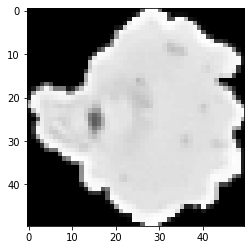

In [ ]:
import matplotlib.pyplot as plt

index = 100

plt.imshow(X_train[index].reshape(50,50),cmap='gray')
print(y_train[index])

In [ ]:
X_train = X_train.reshape(train.shape[0],50,50,1).astype('float32')
X_train = X_train / 255.0

X_test = X_test.reshape(test.shape[0],50,50,1).astype('float32')
X_test = X_test / 255.0

In [ ]:
X_test[index].shape

(50, 50, 1)

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print("X_train shape", X_train.shape)
print("Y_train shape", y_train.shape)

X_train shape (22046, 50, 50, 1)
Y_train shape (22046, 2)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
441/441 [==============================] - 35s 11ms/step - loss: 0.4675 - accuracy: 0.7493
Epoch 2/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1887 - accuracy: 0.9335
Epoch 3/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1569 - accuracy: 0.9440
Epoch 4/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1462 - accuracy: 0.9488
Epoch 5/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1373 - accuracy: 0.9520
Epoch 6/20
441/441 [==============================] - 4s 10ms/step - loss: 0.1296 - accuracy: 0.9529
Epoch 7/20
441/441 [==============================] - 4s 10ms/step - loss: 0.1221 - accuracy: 0.9568
Epoch 8/20
441/441 [==============================] - 4s 10ms/step - loss: 0.1199 - accuracy: 0.9567
Epoch 9/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1119 - accuracy: 0.9596
Epoch 10/20
441/441 [==============================] - 4s 9ms/step - loss: 0.1055 - accuracy: 0

In [ ]:
predictions = model.evaluate(X_test,y_test)

173/173 [==============================] - 1s 5ms/step - loss: 0.1792 - accuracy: 0.9465


Actual [1. 0.]
Predicted [[1.0000000e+00 3.7005796e-10]]


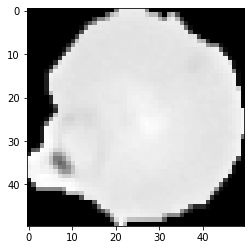

In [ ]:
index = 2

import numpy as np
plt.imshow(X_test[index].reshape(50,50),cmap='gray')
print("Actual",y_test[index])

print("Predicted", model.predict([[X_test[index].reshape(-1,50,50,1)]]))

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)